In [22]:
%pip install pandas scikit-learn matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv("income.csv")
data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


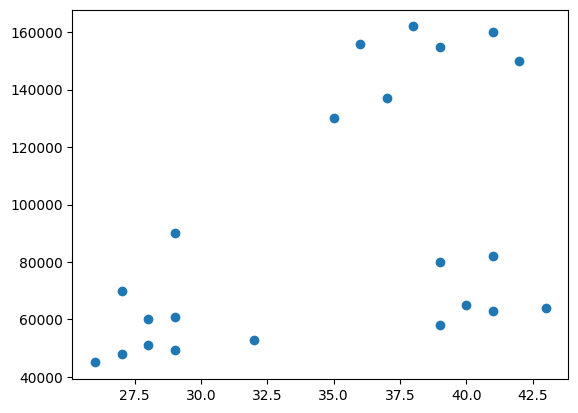

In [25]:
plt.scatter(data['Age'],data[['Income($)']])

In [33]:
Km = KMeans(n_clusters=3)
y = Km.fit_predict(data[['Age','Income($)']])
y

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [34]:
data['cluster'] = y
data

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [35]:
Km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

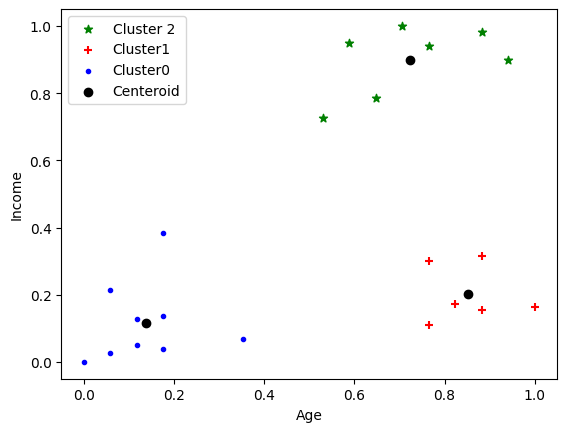

In [36]:
#plt.scatter(data[data['cluster'] == 3]['Age'],data[data['cluster'] == 3]['Income($)'],color='green',marker=',',label='Cluster 3')
plt.scatter(data[data['cluster'] == 2]['Age'],data[data['cluster'] == 2]['Income($)'],color='green',marker='*',label='Cluster 2')
plt.scatter(data[data['cluster'] == 1]['Age'],data[data['cluster'] == 1]['Income($)'],color='red',marker='+',label='Cluster1')
plt.scatter(data[data['cluster']== 0]['Age'],data[data['cluster'] == 0]['Income($)'], color='blue', marker='.',label='Cluster0')
plt.scatter(Km.cluster_centers_[:,0],Km.cluster_centers_[:,1],marker='o',color='black',label='Centeroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [30]:
#standradizing the data
from sklearn.preprocessing import MinMaxScaler

In [31]:
mm = MinMaxScaler()
mm.fit_transform(data[['Income($)']])
data['Income($)'] = mm.transform(data[['Income($)']])
mm.fit(data[['Age']])
data['Age'] = mm.transform(data[['Age']])
data

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


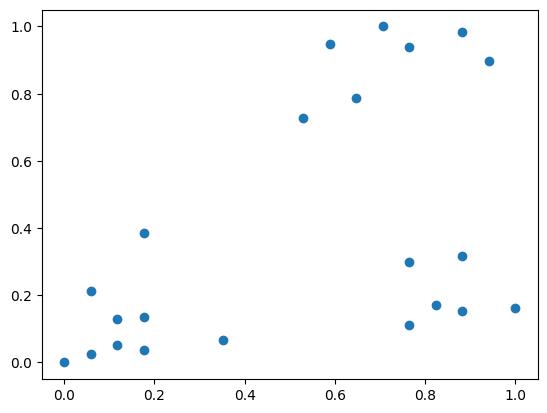

In [37]:
plt.scatter(data.Age,data[['Income($)']])

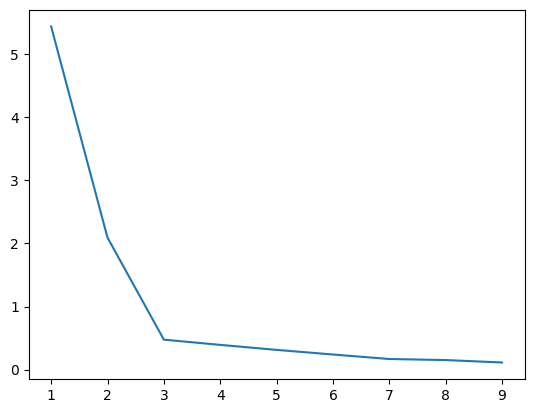

In [ ]:
#determining best k using elbow method
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    y = km.fit(data[['Age','Income($)']])
    sse.append(km.inertia_)

plt.plot(k_range,sse)